In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

In [ ]:
fortune = pd.read_csv('fortune500.csv')
print(fortune.shape)

In [58]:
#ASSIGN MEGAREGIONS

uppermegalopolis = ["NY","MA","RI","CT","NH"]
lowermegalopolis = ["PA", "NJ", "DE", "MD", "VA"]
greatlakesstates = ["IN", "IL", "MI", "OH", "WI", "IA"]
texasgulfstates = ["TX", "LA", "OK"]
piedmont = ["MS","AL","GA", "TN", "SC"]
frontrangestates = ["NM", "UT", "CO", "AZ"]
cascadiastates = ["WA", "OR", "ID"]

label = fortune['hqstate']
fortune['megaregion'] = "None"
fortune.loc[label == 'CA', 'megaregion'] = "California"
fortune.loc[label == 'FL', 'megaregion'] = "Florida"
fortune.loc[label.isin(uppermegalopolis), 'megaregion'] = "Upper Megalopolis"
fortune.loc[label.isin(lowermegalopolis), 'megaregion'] = "Lower Megalopolis"
fortune.loc[label.isin(texasgulfstates), 'megaregion'] = "Texas Gulf"
fortune.loc[label.isin(greatlakesstates), 'megaregion'] = "Great Lakes"
fortune.loc[label.isin(piedmont), 'megaregion'] = "Piedmont"
fortune.loc[label.isin(cascadiastates), 'megaregion'] = "Cascadia"
fortune.loc[label.isin(frontrangestates), 'megaregion'] = "Front Range & Arizona"
fortune.loc[fortune['hqcity'] == 'Buffalo', 'megaregion'] = "Great Lakes"
fortune.loc[fortune['hqcity'] == 'Corning', 'megaregion'] = "Great Lakes"

fortune['isinmegaregion'] = 0
fortune.loc[fortune['megaregion'] != 'None', 'isinmegaregion'] = 1

In [ ]:
#CHECK MEGAREGION VALUE COUNTS

fortune['megaregion'].value_counts()

In [ ]:
#A FEW EXAMPLE PLOTS:

sns.relplot(data=fortune, x='employees', y='profits', hue='isinmegaregion', aspect=1.61)
plt.show()

sns.relplot(data=fortune, x='employees', y='profits', hue='megaregion', aspect=1.61)
plt.show()

sns.relplot(data=fortune, x='revenue', y='profits', hue='isinmegaregion', aspect=1.61)
plt.show()

sns.relplot(data=fortune, x='revenue', y='profits', hue='megaregion', aspect=1.61)
plt.show()

sns.relplot(data=fortune, x='assets', y='profits', hue='isinmegaregion', aspect=1.61)
plt.show()

sns.relplot(data=fortune, x='assets', y='profits', hue='megaregion', aspect=1.61)
plt.show()

In [126]:
X = fortune[['employees','profits']]

In [124]:
def wknn():
  k_values = range(1, 50)
  acc_scores = []

  for k in k_values:
      print("K: " + str(k))
      knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric = 'manhattan')
      knn.fit(Xtr_copy, ttr)
      yte = knn.predict(Xte_copy)
      acc_scores.append(accuracy_score(tte, yte))
      
      print("Accuracy: " + str(acc_scores[k - 1]))
      #print(classification_report(tte, yte))
      confusion_matrix = metrics.confusion_matrix(tte, yte)
      print(confusion_matrix)
  return acc_scores

In [116]:
def normalise(Xtr, Xte):
  scaler = StandardScaler()
  # train the scaler on training data only
  scaler.fit(Xtr)
  # scale training data
  scaledtrain = scaler.transform(Xtr)
  # scale test data
  scaledtest = scaler.transform(Xte)

  print(np.std(scaledtrain[:, 0]))
  print(np.std(scaledtest[:, 0]))

  return scaledtrain,scaledtest

In [ ]:
#W-KNN BINARY CLASSIFICATION

Xtr, Xte, ttr, tte = train_test_split(X, fortune['isinmegaregion'], shuffle=True, test_size=0.60, random_state=69)

Xtr_copy = Xtr.copy()
Xte_copy = Xte.copy()

binary_acc = wknn()

Xtr, Xte, ttr, tte = train_test_split(X, fortune['isinmegaregion'], shuffle=True, test_size=0.60, random_state=69)

Xtr_copy = Xtr.copy()
Xte_copy = Xte.copy()

Xtr, Xte = normalise(Xtr, Xte)
normal_binary_acc = wknn()


In [ ]:
#W-KNN IDENTIFICATION CLASSIFICATION

Xtr, Xte, ttr, tte = train_test_split(X, fortune['megaregion'], shuffle=True, test_size=0.60, random_state=69)

Xtr_copy = Xtr.copy()
Xte_copy = Xte.copy()

identity_acc = wknn()

Xtr, Xte, ttr, tte = train_test_split(X, fortune['megaregion'], shuffle=True, test_size=0.60, random_state=69)

Xtr_copy = Xtr.copy()
Xte_copy = Xte.copy()

Xtr, Xte = normalise(Xtr, Xte)
normal_identity_acc = wknn()

In [ ]:
#PLOT TRAINING DATA
forplot = pd.DataFrame(Xtr, columns=['employees', 'revenues'])
forplot['label'] = ttr
sns.relplot(data=forplot, x='employees', y='revenues', hue='label', aspect=1.61)
plt.show()

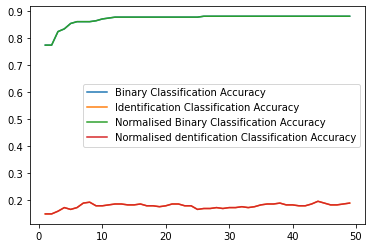

In [125]:
plt.plot(k_values, binary_acc, label = "Binary Classification Accuracy")
plt.plot(k_values, identity_acc, label = "Identification Classification Accuracy")
plt.plot(k_values, normal_binary_acc, label = "Normalised Binary Classification Accuracy")
plt.plot(k_values, normal_identity_acc, label = "Normalised dentification Classification Accuracy")
plt.legend()

In [111]:
def mlp():
  hls_values = range(1, 50)
  mlp_acc_scores = []
  for hls in hls_values:
    mnn = MLPClassifier(hidden_layer_sizes=hls)
    mnn.fit(Xtr,ttr)
    yte = mnn.predict(Xte)
    mlp_acc_scores.append(accuracy_score(yte,tte))
    print(accuracy_score(yte,tte))
    print(metrics.confusion_matrix(tte, yte))
  return mlp_acc_scores

In [ ]:
#MLP IDENTIFICATION CLASSIFICATION

Xtr, Xte, ttr, tte = train_test_split(fortune[['employees','revenues','profits','assets']], fortune['megaregion'], shuffle=True, test_size=0.20, random_state=69)
mlp_identity_acc = mlp()

Xtr, Xte, ttr, tte = train_test_split(fortune[['employees','revenues','profits','assets']], fortune['megaregion'], shuffle=True, test_size=0.20, random_state=69)
Xtr, Xte = normalise(Xtr, Xte)
normal_mlp_identity_acc = mlp()


In [ ]:
#MLP BINARY CLASSIFICATION

Xtr, Xte, ttr, tte = train_test_split(fortune[['employees','revenues','profits','assets']], fortune['isinmegaregion'], shuffle=True, test_size=0.20, random_state=69)
mlp_binary_acc = mlp()

Xtr, Xte, ttr, tte = train_test_split(fortune[['employees','revenues','profits','assets']], fortune['isinmegaregion'], shuffle=True, test_size=0.20, random_state=69)
Xtr, Xte = normalise(Xtr, Xte)
normal_mlp_binary_acc = mlp()


In [ ]:
scores = cross_val_score(mnn, Xte, tte, cv=2)
print(f"Accuracy: mean: {scores.mean()} standard deviation: {scores.std()}")

In [ ]:
hls_values = range(1, 50)
plt.plot(hls_values, mlp_binary_acc, label = "Binary Classification Accuracy")
plt.plot(hls_values, mlp_identity_acc, label = "Identification Classification Accuracy")
plt.plot(hls_values, normal_mlp_binary_acc, label = "Normalised Binary Classification Accuracy")
plt.plot(hls_values, normal_mlp_identity_acc, label = "Normalised Identification Classification Accuracy")
plt.legend()

For table:

In [ ]:
xy = fortune[['employees','profits']]

Xtr, Xte, ttr, tte = train_test_split(xy, fortune['isinmegaregion'], shuffle=True, test_size=0.60)

Xtr_copy = Xtr.copy()
Xte_copy = Xte.copy()

k = 22

print("K: " + str(k))
knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric = 'manhattan')
knn.fit(Xtr_copy, ttr)
yte = knn.predict(Xte_copy)
accuracy = accuracy_score(tte, yte)
print("Accuracy: ", accuracy)
print(metrics.confusion_matrix(tte, yte))